In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

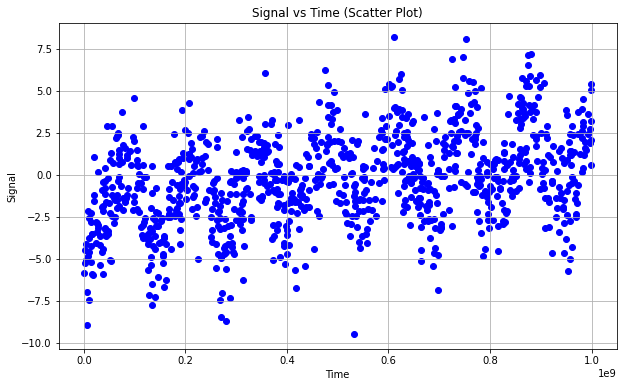

In [70]:
# Load the signal data
file_path = 'signal.csv'
signal_data = pd.read_csv(file_path)

# Clean the column names
signal_data.columns = signal_data.columns.str.strip()

# Extract time and signal data
time = signal_data['time']
signal = signal_data['signal'].astype(float)

# Plot the signal as a function of time
plt.figure(figsize=(10, 6))
plt.scatter(time, signal, color='b')
plt.title('Signal vs Time (Scatter Plot)')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.grid(True)
plt.show()


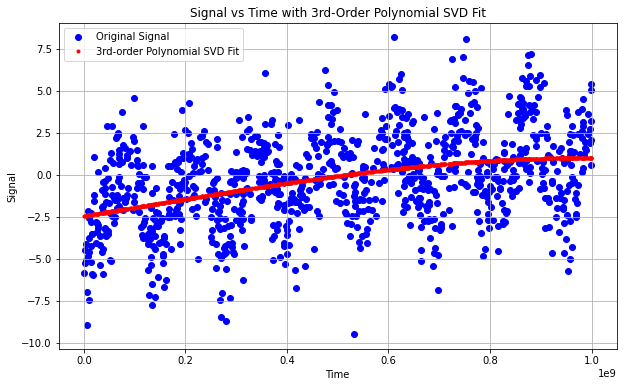

In [62]:
# Scale the time to avoid numerical issues
time_scaled = (time - np.mean(time)) / np.std(time)

# Create the matrix A for the third-order polynomial (1, t, t^2, t^3)
# A = np.vstack([np.ones(len(time_scaled)), time_scaled, time_scaled**2, time_scaled**3]).T

A = np.zeros((len(time_scaled), 4)) #4 since its 3rd order polynomial
A[:, 0] = 1.
A[:, 1] = time_scaled 
A[:, 2] = time_scaled**2
A[:, 3] = time_scaled**3
# print(A)



# Perform SVD on A
U, W, Vt = np.linalg.svd(A, full_matrices=False)



# Compute the pseudo-inverse of the diagonal matrix of singular values
W_inv = np.diag(1 / W)

# Use SVD components to solve for the coefficients
x_svd = Vt.T @ W_inv @ U.T @ signal

# # Extract the polynomial coefficients (a0, a1, a2, a3)
# a0, a1, a2, a3 = x_svd


# print(U.shape)
# print(W.shape)
# print(Vt.shape)
# print(W)




# ainv = Vt.transpose().dot(np.diag(1. / W)).dot(U.transpose())
# x = ainv.dot(signal)
# print(x)

signal_svd = A.dot(x_svd)

# Plot the original signal and the polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(time, signal, color='b', label='Original Signal')
# plt.plot(time, signal, '.', label='data')
plt.plot(time, signal_svd, '.', color='r', label='3rd-order Polynomial SVD Fit')
plt.title('Signal vs Time with 3rd-Order Polynomial SVD Fit')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()
plt.grid(True)
plt.show()

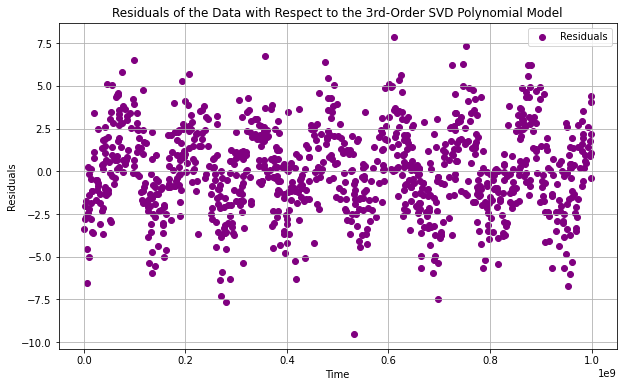

Mean of residuals: 6.785683126508957e-16
Standard deviation of residuals: 2.526251351505633


In [63]:
# Calculate the residuals
residuals = signal - signal_svd

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(time, residuals, color='purple', label='Residuals')
plt.title('Residuals of the Data with Respect to the 3rd-Order SVD Polynomial Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# Calculate summary statistics of the residuals
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

print(f'Mean of residuals: {residual_mean}')
print(f'Standard deviation of residuals: {residual_std}')


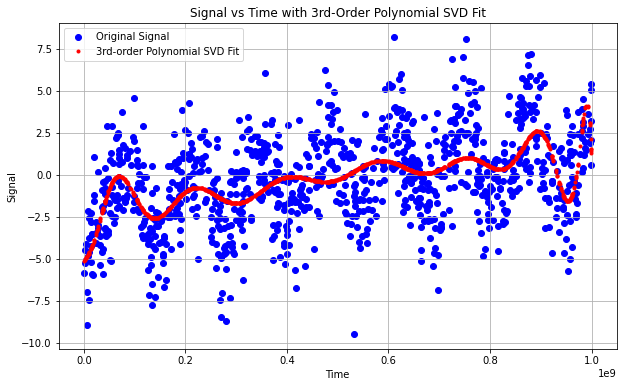

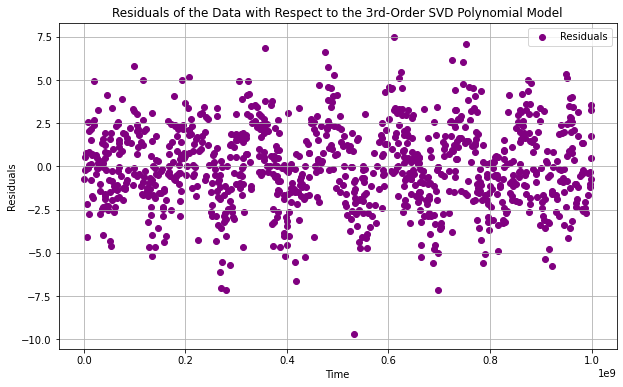

Mean of residuals: -8.029127585018614e-12
Standard deviation of residuals: 2.3644331029383627


In [64]:
# Scale the time to avoid numerical issues
time_scaled = (time - np.mean(time)) / np.std(time)

# Create the matrix A for the third-order polynomial (1, t, t^2, t^3)
# A = np.vstack([np.ones(len(time_scaled)), time_scaled, time_scaled**2, time_scaled**3]).T

A = np.zeros((len(time_scaled), 17))

# Use a loop to fill in the columns of A
for i in range(17):
    A[:, i] = time_scaled**i

# print(A)



# Perform SVD on A
U, W, Vt = np.linalg.svd(A, full_matrices=False)



# Compute the pseudo-inverse of the diagonal matrix of singular values
W_inv = np.diag(1 / W)

# Use SVD components to solve for the coefficients
x_svd = Vt.T @ W_inv @ U.T @ signal

# # Extract the polynomial coefficients (a0, a1, a2, a3)
# a0, a1, a2, a3 = x_svd


# print(U.shape)
# print(W.shape)
# print(Vt.shape)
# print(W)




# ainv = Vt.transpose().dot(np.diag(1. / W)).dot(U.transpose())
# x = ainv.dot(signal)
# print(x)

signal_svd = A.dot(x_svd)

# Plot the original signal and the polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(time, signal, color='b', label='Original Signal')
# plt.plot(time, signal, '.', label='data')
plt.plot(time, signal_svd, '.', color='r', label='3rd-order Polynomial SVD Fit')
plt.title('Signal vs Time with 3rd-Order Polynomial SVD Fit')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()
plt.grid(True)
plt.show()


# Calculate the residuals
residuals = signal - signal_svd

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(time, residuals, color='purple', label='Residuals')
plt.title('Residuals of the Data with Respect to the 3rd-Order SVD Polynomial Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# Calculate summary statistics of the residuals
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

print(f'Mean of residuals: {residual_mean}')
print(f'Standard deviation of residuals: {residual_std}')


In [67]:
import numpy as np

# Function to evaluate polynomials and their condition numbers
def evaluate_polynomials(max_degree, time_scaled, signal):
    condition_numbers = []

    for degree in range(1, max_degree + 1):
        # Create the design matrix for the current polynomial degree
        A = np.vstack([time_scaled**i for i in range(degree + 1)]).T
        
        # Compute the condition number of the design matrix
        condition_number = np.linalg.cond(A)
        condition_numbers.append((degree, condition_number))
        
        # Stop if condition number becomes too large (ill-conditioned matrix)
        if condition_number > 1e6:
            break

    return condition_numbers

# Set maximum polynomial degree to evaluate
max_degree = 16

# Evaluate the condition numbers for polynomials up to max_degree
condition_numbers = evaluate_polynomials(max_degree, time_scaled, signal)

# Output the condition numbers for each polynomial degree
for degree, cond_number in condition_numbers:
    print(f'Degree: {degree}, Condition Number: {cond_number}')


Degree: 1, Condition Number: 1.000000000000003
Degree: 2, Condition Number: 2.795960715317588
Degree: 3, Condition Number: 5.919954774602304
Degree: 4, Condition Number: 15.014602653079354
Degree: 5, Condition Number: 36.591702089559945
Degree: 6, Condition Number: 99.91203275268249
Degree: 7, Condition Number: 256.95471915683675
Degree: 8, Condition Number: 697.2751456365033
Degree: 9, Condition Number: 1931.0513726689135
Degree: 10, Condition Number: 5313.972718043967
Degree: 11, Condition Number: 15200.075003058748
Degree: 12, Condition Number: 41558.76248058818
Degree: 13, Condition Number: 118981.86344773023
Degree: 14, Condition Number: 328420.33053528314
Degree: 15, Condition Number: 959548.291305565
Degree: 16, Condition Number: 2711994.7952595083


not a good polynomial fir. the ones that reduce sd have a high condition number so are super sensitive and not stable

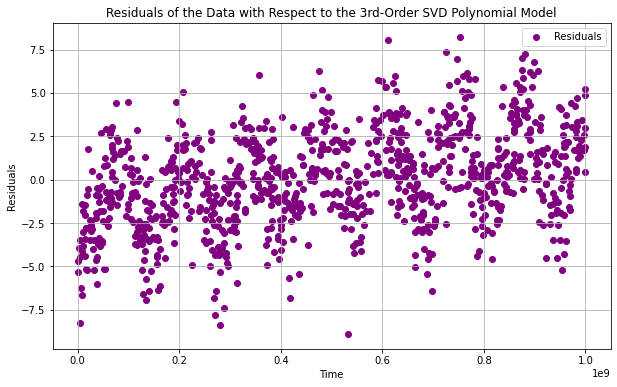

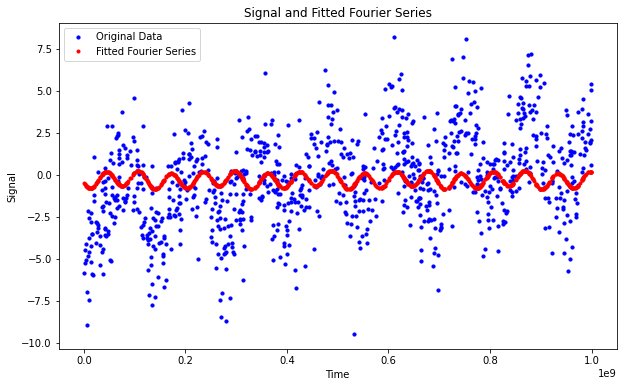

Mean of residuals: -1.2107173845699037e-09
Standard deviation of residuals: 2.730014932095645
Estimated Parameters: [-0.29725858  0.06243059 -0.07909951 -0.00129726  0.03861655 -0.45416683
 -0.14417808]
Typical Periodicity (from fitted model): 190424108.64999998


In [104]:

# Sample function to define a Fourier series with sine and cosine terms
def fourier_series(t, *coeffs):
    n = len(coeffs) // 2  # Number of sine and cosine terms
    result = coeffs[0]  # Initial offset
    for i in range(n):
        result += coeffs[2*i + 1] * np.sin(2 * np.pi * (i + 1) * t / period)  # Sine term
        result += coeffs[2*i + 2] * np.cos(2 * np.pi * (i + 1) * t / period)  # Cosine term
    return result


# Set the period to half of the time span to represent the simplist curve first
time_span = time[len(time)-1] - time[0]
period = time_span / 2

# Initial guess for coefficients [offset, sin1, cos1, sin2, cos2, ...]
initial_guess = [0] + [1] * (6)  # 0 offset 2 sine and 2 cosine terms

# Fit the model to the data
params, _ = curve_fit(fourier_series, time, signal, p0=initial_guess)

# Generate fitted data
fitted_signal = fourier_series(time, *params)

# Calculate residuals
residuals = signal - fitted_signal


# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(time, residuals, color='purple', label='Residuals')
plt.title('Residuals of the Data with Respect to the 3rd-Order SVD Polynomial Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


# Plot original data and fitted model
plt.figure(figsize=(10, 6))
plt.scatter(time, signal, label='Original Data', color='blue', s=10)
plt.plot(time, fitted_signal, '.', label='Fitted Fourier Series', color='red')
plt.title('Signal and Fitted Fourier Series')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

plt.show()


# Calculate summary statistics of the residuals
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

print(f'Mean of residuals: {residual_mean}')
print(f'Standard deviation of residuals: {residual_std}')

# Output the estimated parameters and typical periodicity
print("Estimated Parameters:", params)
print("Typical Periodicity (from fitted model):", period)
